# В чем популярность треков на tiktok?

В этом проекте я собираюсь изучить набор данных о популярных треках на tiktok в 2022 году. Я надеюсь, это будет представлять интерес для тех, кто заинтересован продвижением на этой платформе или просто любителям tiktok (как и я).
Я хочу выполнить предварительный анализ набора данных, включая множество визуализаций данных, чтобы понять его структуру и найти закономерности между данными и нашей основной переменной, представляющей интерес, "track_pop"(Популярность трека).

**Исследовательские вопросы**  
Какие треки самые популярные?  
Кто самые популярные артисты?  
Как различные описания настроения трека влияют на популярность?  
Важны ли различные акустические характеристики трека для популярности?  
Влияет ли продолжительность трека на его популярность? 
Какими характеристиками должен обладать популярный трек?

Приятного прочтения!

In [79]:
# В Python 3 установлено множество полезных аналитических библиотек, мы их загружаем сразу
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [80]:
df_tiktok = pd.read_csv('TikTok_songs_2022.csv', sep=',') #Импортируем сам датасет
print(f"Shape of the dataset -> {df_tiktok.shape}") #Понимаем, что количество строк 263, а столбиков 18

Shape of the dataset -> (263, 18)


In [81]:
df_tiktok.info() #На первый взгляд кажется, что у нас в датасете нет пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

In [82]:
df_tiktok[:2]

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720,0.00314,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342,0.00101,0.3110,0.662,173.930,4,167303


In [83]:
df_tiktok.head() #видим, что не все значения стобцов понятны

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


Чтобы было понятно значение столбцов, переименуем их (данные взяты из описания датасета)

In [84]:
df_tiktok.rename(columns = {'track_name': 'Название трека', 'artist_name': 'Артист', 'artist_pop': 'Популярность артиста',
                            'album': 'Альбом', 'track_pop': 'Популярность трека', 'danceability': 'Зажигательность', 
                            'energy': 'Энергичность', 'loudness': 'Громкость', 'mode': 'Режим', 'key': 'Ключ', 
                            'speechiness': 'Разговорность', 'acousticness': 'Акустичность', 
                            'instrumentalness': 'Инструментальность', 
                            'liveness': 'Запись в реальном времени', 'valence': 'Настроение трека', 'tempo': 'Темп',
                            'time_signature': 'Такт', 'duration_ms': 'Длительность в милисекундах'}, inplace = True)

📝Описание столбцов  
**track_name** - Название трека  
**artist_name** - Имя исполнителя  
**artist_pop** - Популярность исполнителя    
**album** - название альбома  
**track_pop** - Популярность трека  
**danceability** - Зажигательность описывает, насколько трек подходит для танцев, основываясь на комбинации музыкальных элементов, включая темп, стабильность ритма, ритм сила и общая регулярность. Значение 0.0 является наименее танцевальным, а 1.0 - наиболее танцевальным.  
**energy** - Энергия является мерой от 0,0 до 1,0 и представляет собой воспринимаемую меру интенсивности и активности. Как правило, энергичные треки кажутся быстрыми, громкими и шумными. Например, дэт-метал обладает высокой энергетикой, в то время как прелюдия Баха набирает низкие баллы по шкале. Особенности восприятия, влияющие на этот атрибут, включают динамический диапазон, воспринимаемую громкость, тембр, скорость начала и общую энтропию.  
**loudness** - общая громкость трека в децибелах (дБ). Значения громкости усредняются по всей дорожке и полезны для сравнения относительной громкости трека.  
**mode** - Режим указывает модальность (мажорную или минорную) трека, тип гаммы, из которой извлекается его мелодическое содержание. Мажор представлен 1, а минор - 0.  
**key** - ключ, в котором находится трек. Целые числа сопоставляются с высотой тона, используя стандартную нотацию класса высоты тона. Например, 0 = C, 1 = C♯ / D♭, 2 = D и так далее. Если ключ не был обнаружен, значение равно -1.  
**speechiness** - Разговорность определяет наличие произносимых слов в треке. Чем больше запись похожа исключительно на речь (например, ток-шоу, аудиокнига, стихи), тем ближе значение атрибута к 1.0. Значения выше 0,66 описывают треки, которые, вероятно, полностью состоят из произносимых слов. Значения от 0,33 до 0,66 описывают треки, которые могут содержать как музыку, так и речь, либо по частям, либо слоями, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют собой музыкальные и другие неречевые треки.  
**acousticness** - показатель достоверности от 0,0 до 1,0 того, является ли дорожка акустической. 1.0 означает высокую степень уверенности в том, что трек является акустическим.  
**instrumentalness** - предсказывает, не содержит ли трек вокала. Звуки "Ох" и "ааа" в этом контексте рассматриваются как инструментальные. Рэп или разговорные треки явно "вокальные". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокального контента. Значения выше 0,5 предназначены для представления инструментальных треков, но достоверность возрастает по мере приближения значения к 1,0.  
**liveness** - Режим реального времени. определяет присутствие аудитории в записи. Более высокие значения живучести представляют собой повышенную вероятность того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек находится в режиме реального времени.  
**valence** - настроение трека: показатель от 0,0 до 1,0, описывающий музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, жизнерадостные, эйфорические), в то время как треки с низкой валентностью звучат более негативно (например, грустные, подавленные, злые).  
**tempo** - общий предполагаемый темп трека в ударах в минуту (BPM). В музыкальной терминологии темп - это скорость  
**time_signature** - предполагаемая временная подпись. Временная сигнатура (метр) - это условное обозначение, определяющее, сколько ударов приходится на каждый такт (или такт). Временная сигнатура находится в диапазоне от 3 до 7, что указывает на временные сигнатуры от "3/4" до "7/4".  
**duration_ms** - длительность трека в миллисекундах.

In [158]:
df_tiktok[:2] #Проверим, как теперь отображаются названия столбцов

,Название трека,Артист,Популярность артиста,Альбом,Популярность трека,Зажигательность,Энергичность,Громкость,Режим,Ключ,Разговорность,Акустичность,Инструментальность,Запись в реальном времени,Настроение трека,Темп,Такт,Длительность в милисекундах,artist_pop_cat
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720,0.00314,0.0604,0.197,108.375,4,298933,Популярный
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342,0.00101,0.3110,0.662,173.930,4,167303,Очень популярный


# Исследования данных и их визуализация. 

Для начала посмотрим на гистограммы основных характеристик треков, чтобы найти или исключить данные.

Мы начинаем с функции, которая настраивает оси таким образом, чтобы они были минимальными и приятными для глаз.

Сразу же мы переходим к определению нашей функции для создания пользовательских гистограмм.

In [86]:
def set_style(ax):
    sns.despine(ax=ax, left=True)
    ax.grid(axis='y', linewidth=0.3)

In [87]:
def hist(df_tiktok, x, ax, bins=30):
    
    sns.histplot(data=df_tiktok, x=x, bins=bins, ax=ax,
                 kde=True, line_kws={"linestyle":'--'}, linewidth=3)
    set_style(ax)
    
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

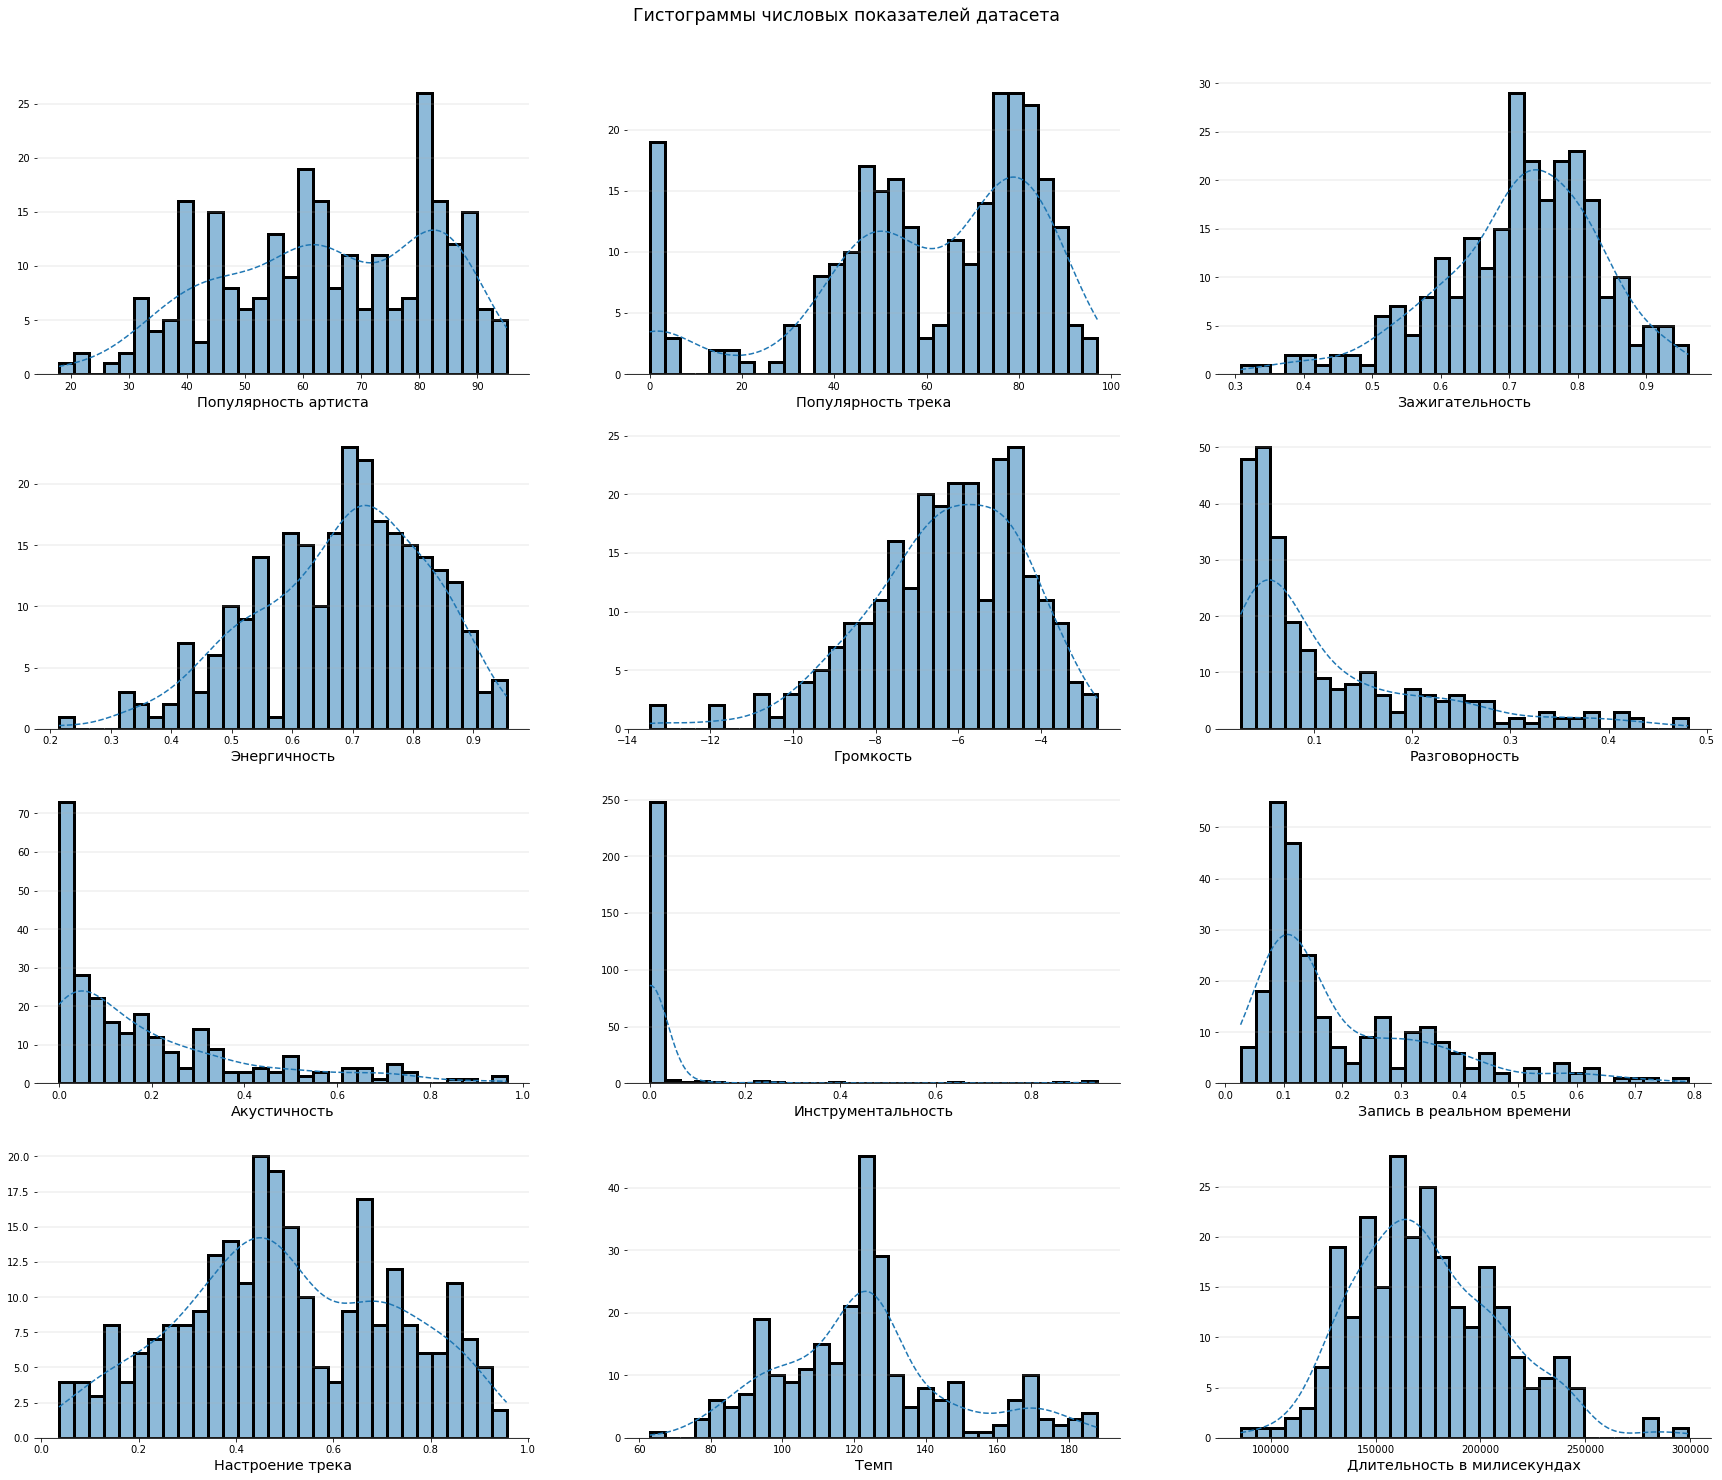

In [88]:
cols = ['Популярность артиста', 'Популярность трека', 'Зажигательность', 'Энергичность', 'Громкость', 'Разговорность',
       'Акустичность', 'Инструментальность', 'Запись в реальном времени', 'Настроение трека', 'Темп', 
        'Длительность в милисекундах']

fig, axs = plt.subplots(4, 3, figsize=(30, 25))

for i, col in enumerate(cols):
    
    row_index = i // 3
    col_index = i % 3
    
    hist(df_tiktok, col, axs[row_index][col_index])

fig.suptitle("Гистограммы числовых показателей датасета", fontsize="xx-large", y=0.92)
    
plt.show()

**Что можем заметить?**  
В переменной **'Популярность трека'**, которая является главной в нашем исследовании, есть скачок на 0. Вероятно, это означает, что для таких треков у нас есть недостающие данные, которые нам придется либо устранить, либо заменить средним значением по столбцу.  

**'Громкость'** - единственная функция с отрицательными значениями  

**'Инструментальность'** имеет почти все значения в 0:скорее всего, мало информации в датасете. Этот столбец можно исключить.  

Давайте теперь перейдем к созданию функции для визуализации распределения категориальных переменных (которые также представлены в числовой форме) и построим график.

In [89]:
def count(df_tiktok, x, ax):
    
    ax.bar(df_tiktok[x].value_counts().index, df_tiktok[x].value_counts().values, linewidth=3)
    
    set_style(ax)
    
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

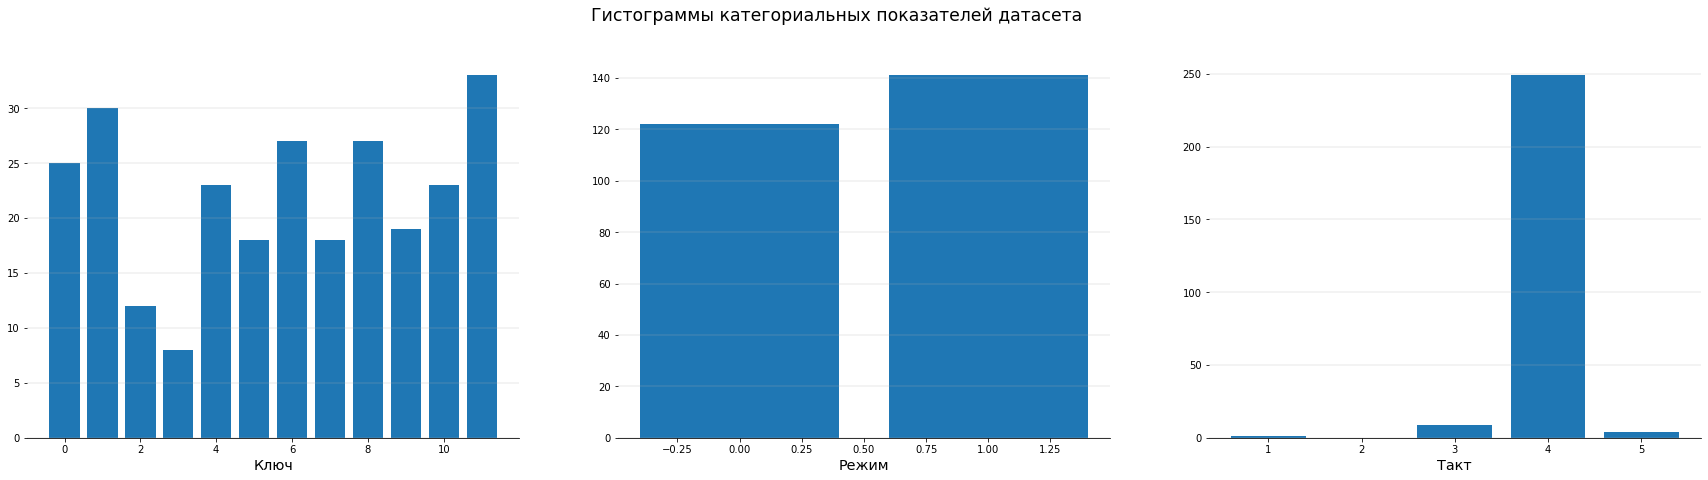

In [90]:
cols = ['Ключ', 'Режим', 'Такт']


fig, ax = plt.subplots(1, 3, figsize=(30, 7))

for i, col in enumerate(cols):

    count(df_tiktok, col, ax[i])
    
fig.suptitle("Гистограммы категориальных показателей датасета", size="xx-large")

plt.show()

Мы сразу замечаем, что столбец **"ключ"** имеет относительно равномерное распределение, **"режим"** разделен почти поровну, с небольшим преимуществом в значении 1, в то время как **"Такт"** почти полностью состоит из значения 4.

# Какие корреляции между всеми колонками?

Зададим функцию корреляции и выясним

In [91]:
def corr_map(df_tiktok, ax, palette):
    
    corr = df_tiktok.corr()
    
    sns.heatmap(corr, annot=True, ax=ax,
               cmap=palette, square=True, linewidth=.5,
               vmin=-1, vmax=1, fmt=".2f")

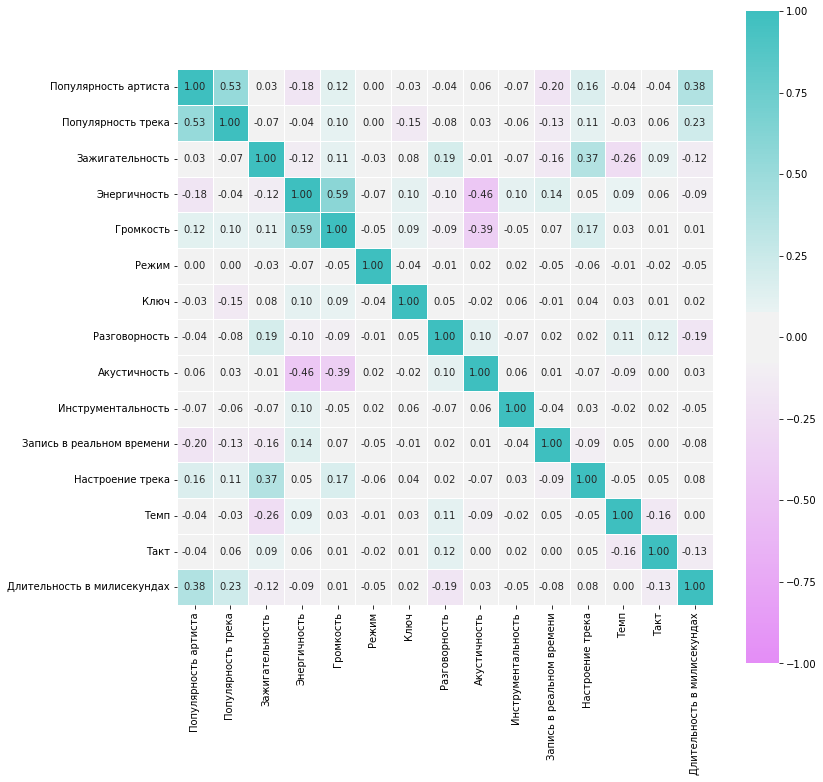

In [92]:
fig, ax = plt.subplots(figsize=(12, 12))

palette = sns.diverging_palette(299, 192, s=89, l=71, as_cmap=True, sep=20)

corr_map(df_tiktok, ax, palette)

Здесь нет особенно сильных корреляций.  

Однако видно зависимость между популярностью песни и популярностью исполнителя, а также существует дискретная линейная зависимость между продолжительностью трека и популярностью исполнителя и между настроением трека и зажигательностью (говорит о том, что более позитивные треки больше годятся для танцев) а также обратная зависимость между энергичностью и акустичностью (акустические треки не кажутся энергичными) 

# Определим популярных артистов и треки

In [159]:
#Найдем топ-3 популярных артиста
artists_pop_sorted = df_tiktok.loc[:, ['Артист', 'Популярность артиста']].drop_duplicates('Артист').sort_values('Популярность артиста', ascending=False)

artists_pop_sorted[:3]

,Артист,Популярность артиста
220,Drake,95
114,The Weeknd,93
1,Harry Styles,91


Самым популярным артистом оказался Drake, за ним The Weeknd и Harry Styles

In [117]:
#Будут ли они среди тех, у кого больше всего хитов в 2022?
artists_top_hits = df_tiktok['Артист'].value_counts(ascending=False)

artists_top_hits[:3]

Doja Cat     8
Coopex       6
Dame Dame    5
Name: Артист, dtype: int64

Как оказалось, ни один из 3 популярных исполнителей, упомянутых выше, не входит в топ-3 исполнителей по количеству просмотров. Лидирует Doja Cat, с не менее чем 8 треками! На втором месте Coopex с 6 попаданиями, а на третьем - Dame Dame с 5.  
Как еще можем посмотреть на популярные треки популярных артистов?

In [151]:
df = artists_pop_sorted[:10] #посмотрим визуально разброс популярных треков по артистам, для этого создадим новый датафрейм

In [152]:
df_tiktok.loc[df_tiktok["Артист"].isin(artists_pop_sorted),'Артист'] = 'Other'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


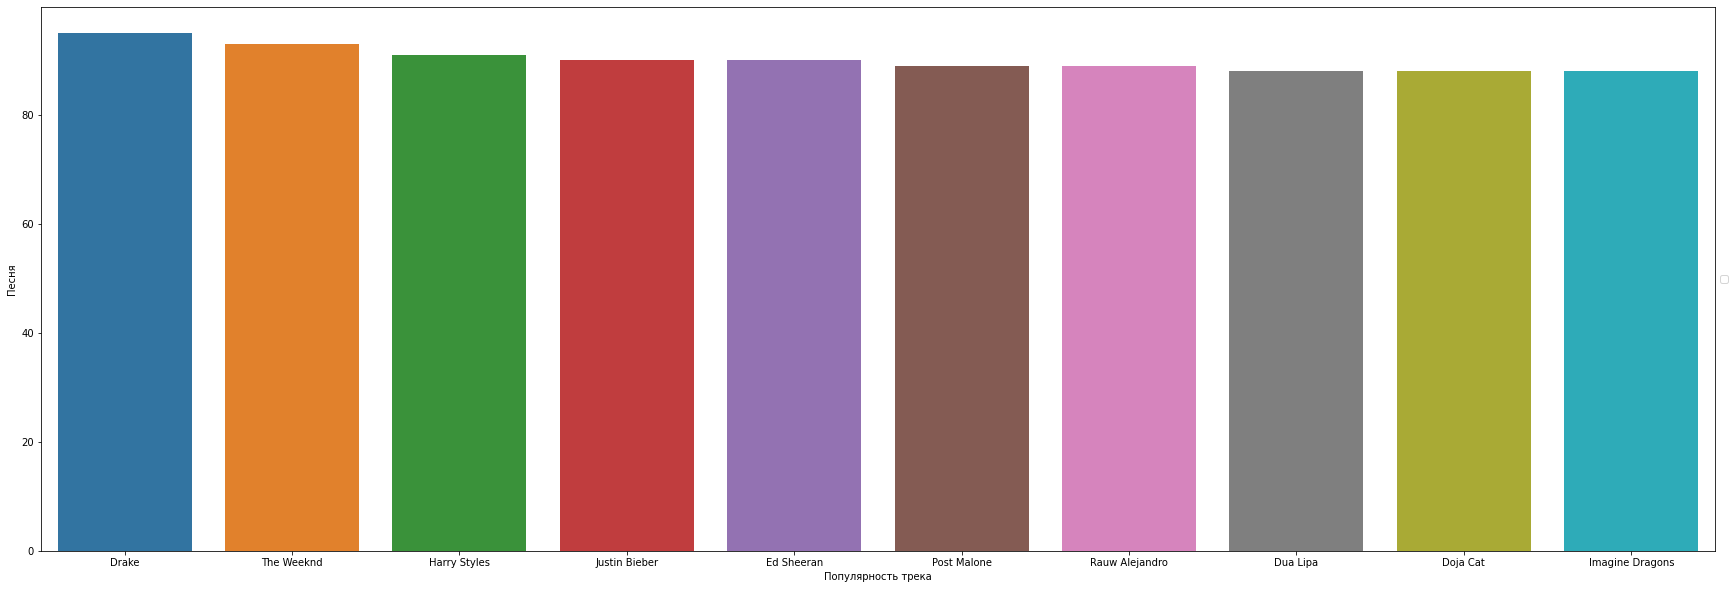

In [153]:
plt.figure(figsize=(30,10))

sns.barplot(data=df[["Артист", "Популярность артиста"]], x='Артист',y='Популярность артиста')
plt.ylabel('Песня')
plt.xlabel('Популярность трека')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Также видно, что нет большого отрыва среди первых 10 артистов по количеству популярных треков  



А какой вообще разброс между популярными и непопулярными артистами? Сколько их в каждой категории? Для этого присвоим новую категориальную переменную

In [97]:
df_tiktok['Популярность артиста'].min() #выясним минимальное значение переменной

18

In [98]:
df_tiktok['Популярность артиста'].mean() #выясним среднее значение переменной

64.18631178707224

<AxesSubplot:>

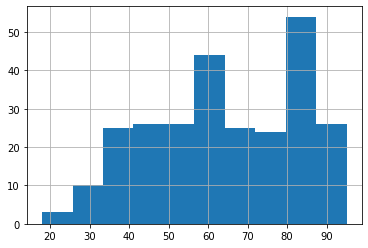

In [99]:
df_tiktok['Популярность артиста'].hist() #выведем гистограмму

In [100]:
def get_pop_cat(artist_pop): 
    if artist_pop <=40:
        return "Непопулярный"
    elif artist_pop <=60:
        return "Средне-популярный"
    elif artist_pop <=85:
        return "Популярный"
    elif artist_pop <=95:
        return "Очень популярный"
    else: 
        return artist_pop
    #Разобьем на категории отталкиваясь от разброса данных, видных на гистограмме

In [101]:
df_tiktok['artist_pop_cat'] = df_tiktok['Популярность артиста'].apply(get_pop_cat) #присвоим переменную

In [132]:
df_tiktok['artist_pop_cat'].value_counts(ascending=True) #видим, что больше всего популярных треков
#сколько категорий в %? Построим пайчарт

Очень популярный      32
Непопулярный          34
Средне-популярный     75
Популярный           122
Name: artist_pop_cat, dtype: int64

In [133]:
df_artist_pop_cat = df_tiktok['artist_pop_cat'].value_counts(ascending=True) #сохраним датафрейм для пайчарта

In [134]:
df_artist_pop_cat #проверили новый датафрейм

Очень популярный      32
Непопулярный          34
Средне-популярный     75
Популярный           122
Name: artist_pop_cat, dtype: int64

<AxesSubplot:title={'center':'Популярные артисты'}>

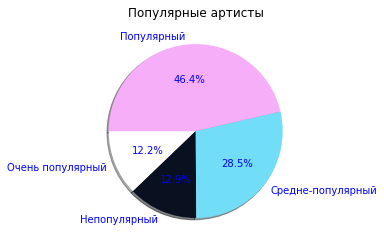

In [156]:
colors = ['White', "#09101F","#72DDF7", '#F7AEF8'] #Присваиваем нашему чарту цвета Tiktok: Black - Aqua Blue - Pink - White
df_artist_pop_cat.plot(kind = 'pie', ylabel='', colors = colors, title = 'Популярные артисты', autopct = '%.1f%%', 
    startangle = 180, shadow = True, textprops = {'color': 'b'})

Видим, что больше всего популярных артистов 46%, затем средне-популярные с 28% и по 12% очень популярных  и непопулярных   


**Как соотносятся категории популярных артистов и популярных треков?**  
Создадим новую категорию популярных треков по аналогии с популярными артистами

In [161]:
df_tiktok['Популярность трека'].mean() #выясняем среднее значение популярности треков

59.844106463878326

<AxesSubplot:>

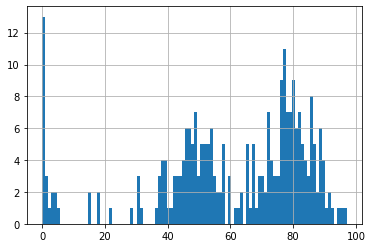

In [162]:
df_tiktok['Популярность трека'].hist(bins=100) #выводим гистограмму, чтобы посмотреть разброс данных
#видим, что есть треки с 0 значением популярности и там есть выброс, поэтому удалим их

In [163]:
df_poptrack = df_tiktok[df_tiktok['Популярность трека'] > 0] #создадим новый датафрейм, исключив популярные треки со значением 0

In [138]:
df_poptrack[:2] #проверим новый датафрейм

,Название трека,Артист,Популярность артиста,Альбом,Популярность трека,Зажигательность,Энергичность,Громкость,Режим,Ключ,Разговорность,Акустичность,Инструментальность,Запись в реальном времени,Настроение трека,Темп,Такт,Длительность в милисекундах,artist_pop_cat
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720,0.00314,0.0604,0.197,108.375,4,298933,Популярный
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342,0.00101,0.3110,0.662,173.930,4,167303,Очень популярный


<AxesSubplot:>

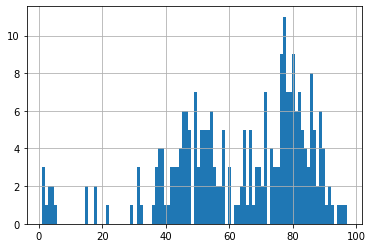

In [142]:
df_poptrack['Популярность трека'].hist(bins=100) #на новой гистраграмме кажется, что данные распределены более равномерно

In [140]:
def get_poptrack_cat(track_pop): 
    if track_pop <=40:
        return "Непопулярный"
    elif track_pop <=60:
        return "Средне-популярный"
    elif track_pop <=85:
        return "Популярный"
    elif track_pop <=97:
        return "Очень популярный"
    else: 
        return track_pop
    #Разобьем на категории отталкиваясь от разброса данных, видных на гистограмме

In [165]:
df_poptrack['track_pop_cat'] = df_poptrack['Популярность трека'].apply(get_poptrack_cat) #присвоим переменную

C:\Users\Kornilova\AppData\Local\Temp\ipykernel_10692\1140927036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poptrack['track_pop_cat'] = df_poptrack['Популярность трека'].apply(get_poptrack_cat) #присвоим переменную


In [166]:
df_poptrack['track_pop_cat'].value_counts(ascending=True) #посмотрим, сколько треков в каждой категории

Очень популярный      32
Непопулярный          32
Средне-популярный     77
Популярный           109
Name: track_pop_cat, dtype: int64

In [167]:
df_track_pop_cat = df_poptrack['track_pop_cat'].value_counts(ascending=True) #создадим новый датафрейм, чтобы создать пайчарт

<AxesSubplot:title={'center':'Популярные треки'}>

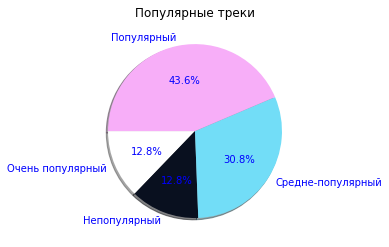

In [168]:
colors = ['White', "#09101F","#72DDF7", '#F7AEF8'] #Присваиваем нашему чарту цвета Tiktok: Black - Aqua Blue - Pink - White
df_track_pop_cat.plot(kind = 'pie', ylabel='', colors = colors, title = 'Популярные треки', autopct = '%.1f%%', 
    startangle = 180, shadow = True, textprops = {'color': 'b'})

Видим, что пайчарты "Популярные артисты" и "Популярные треки" похожи, попробуем их сгруппировать

In [148]:
df_poptrack.groupby('artist_pop_cat')['track_pop_cat'].agg(lambda x: x.value_counts().index[0]) 
#сгруппируем две наши категориальные переменные через новую функцию

artist_pop_cat
Непопулярный         Средне-популярный
Очень популярный            Популярный
Популярный                  Популярный
Средне-популярный    Средне-популярный
Name: track_pop_cat, dtype: object

Видим, что чаще всего у средне-популярных артистов получаются средне-популярные треки, а среди очень популярных и популярных артистов - популярные треки. 

**А теперь выясним топ-5 песен по популярности**

In [119]:
tracks_pop_sorted = df_tiktok.loc[:, ['Название трека', 'Популярность трека']].sort_values('Популярность трека', ascending=False)

tracks_pop_sorted[:5]

,Название трека,Популярность трека
5,Glimpse of Us,97
1,As It Was,96
0,Running Up That Hill (A Deal With God),95
52,Late Night Talking,93
260,Jimmy Cooks (feat. 21 Savage),92


Таким образом, мы видим, что самым популярным треком является Glimpse of Us у исполнителя Joji, дальше идут Harry Styles (два трека), Kate Bush, Drake 
Видим, что Harry Styles и Drake остаются в топ-позициях как исполнители и как обладатели популярных. 

Как вообще определить, что влияет на популярность треков?

Попробуем разобрать корреляции, разбив все характеристики на две группы "описания настроения трека" и "акустические характеристики"

**Как различные описания настроения трека влияют на популярность?**

<AxesSubplot:>

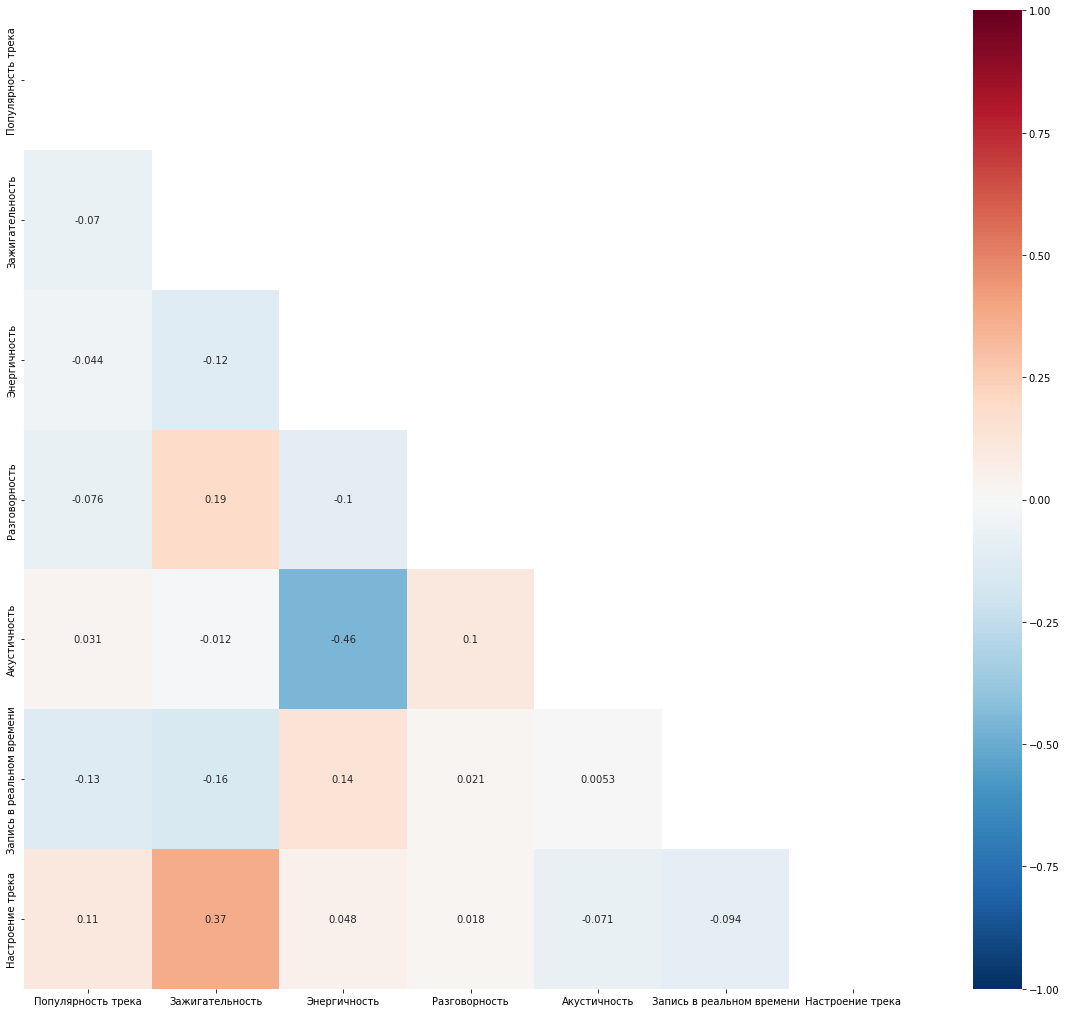

In [120]:
columns_mood = ['Популярность трека', 'Зажигательность', 'Энергичность', 'Разговорность',
                'Акустичность', 'Запись в реальном времени', 'Настроение трека'] 
#эти характеристики влияют скорее на муд трека

mask = np.triu(np.ones_like(df_tiktok[columns_mood].corr(), dtype=bool))

plt.figure(figsize = (20,18))
sns.heatmap(df_tiktok[columns_mood].corr(), data = df_tiktok[columns_mood], mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

С помощью тепловой карты видим, что **"Акустичность"** и **"Настроение трека"** наиболее линейно коррелируют с популярностью. Существуют также некоторые корреляции между такими предикторами, как "Настроение трека" и "Зажигательность", а также между энергичностью и громкостью.

**Какие акустические характеристики трека важны для его популярности?**

<AxesSubplot:>

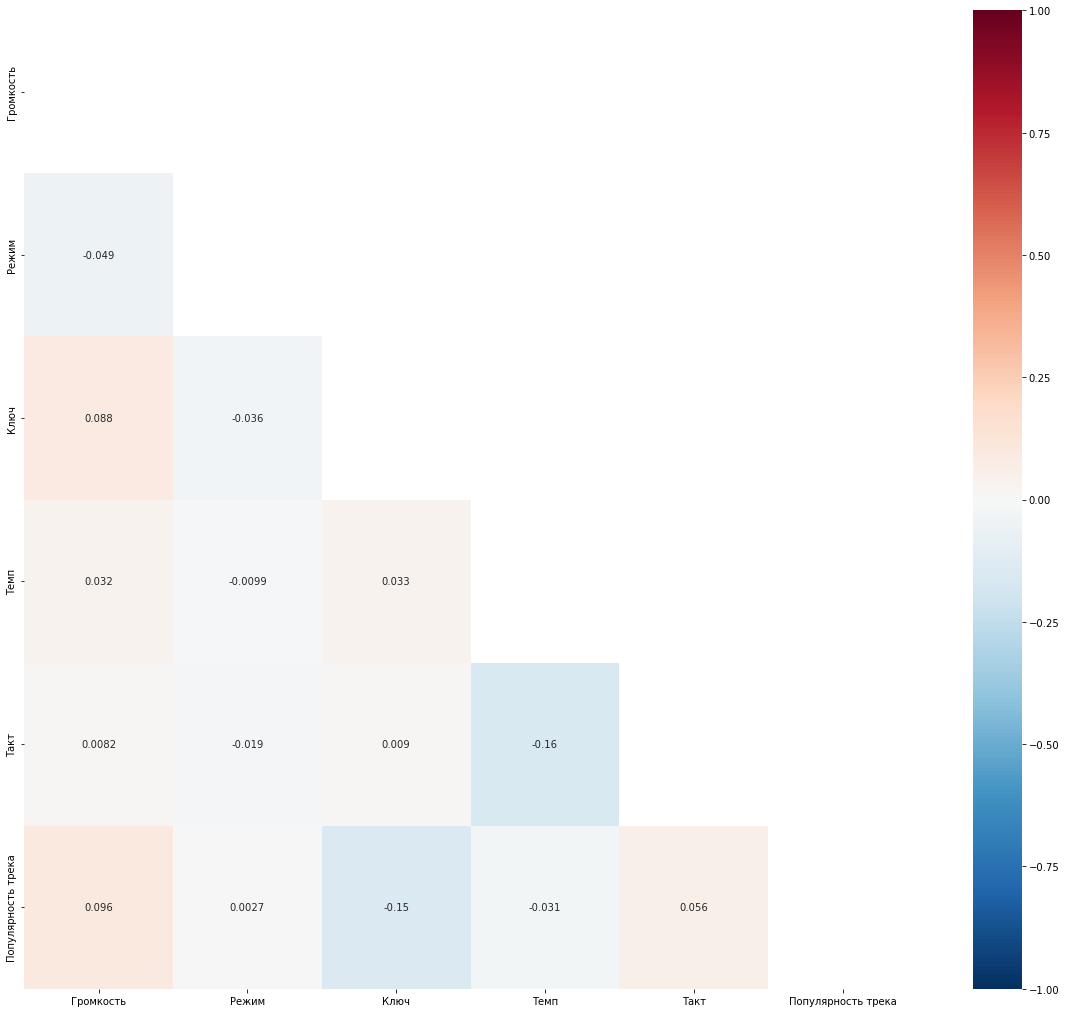

In [169]:
columns_acoustic = ["Громкость", "Режим", "Ключ", "Темп", "Такт","Популярность трека"] 
# взяли переменные, которые обладают скорее акустическим характером

mask = np.triu(np.ones_like(df_tiktok[columns_acoustic].corr(), dtype=bool))

plt.figure(figsize = (20,18))
sns.heatmap(df_tiktok[columns_acoustic].corr(), data = df_tiktok[columns_acoustic], mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

Похоже, такие характеристики, как **"Громкость"** и **"Такт"** больше всего важны для популярности трека.

**А влияет ли длительность композиции на популярность трека?**

<AxesSubplot:xlabel='Длительность в милисекундах', ylabel='Популярность трека'>

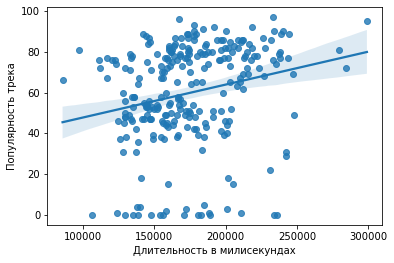

In [122]:
sns.regplot(x=df_tiktok["Длительность в милисекундах"], y=df_tiktok["Популярность трека"])

Существует лишь небольшая связь между продолжительностью трека и популярностью.

<AxesSubplot:xlabel='Популярность трека', ylabel='Длительность в милисекундах'>

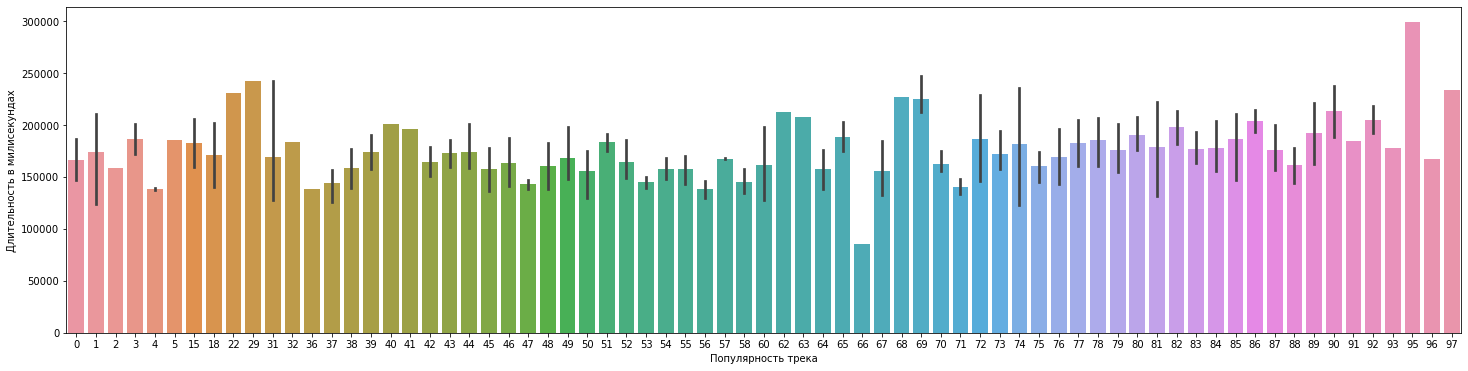

In [123]:
plt.figure(figsize=(25,6))
sns.barplot(x='Популярность трека',y='Длительность в милисекундах',data = df_tiktok)
#также посмотрим на распределение данных популярности трека и длительности

Кажется, данные распределены равномерно

**Теперь посмотрим на популярные треки, какими характеристиками они обладают?**

In [ ]:
tracks_pop_sorted[:5]

In [124]:
#здесь мы берем только те переменные, в которых увидели корреляцию с популярностью
tracks_pop_sorted = df_tiktok.loc[:, ['Название трека', 'Популярность трека', 'Популярность артиста', 'Акустичность', 'Громкость', 'Такт',
                                      'Длительность в милисекундах', 'Настроение трека']].sort_values('Популярность трека', ascending=False)

tracks_pop_sorted[:5]

,Название трека,Популярность трека,Популярность артиста,Акустичность,Громкость,Такт,Длительность в милисекундах,Настроение трека
5,Glimpse of Us,97,85,0.891000,-9.258,3,233456,0.268
1,As It Was,96,91,0.342000,-5.338,4,167303,0.662
0,Running Up That Hill (A Deal With God),95,81,0.720000,-13.123,4,298933,0.197
52,Late Night Talking,93,91,0.298000,-4.595,4,177955,0.901
260,Jimmy Cooks (feat. 21 Savage),92,95,0.000307,-4.711,4,218365,0.366


Теперь мы можем описать самые популярные треки с помощью тех характеристик, которые удалось выяснить.    
Во-первых, это очень популярные треки от очень популярных и популярных артистов.    
На первом месте **Glimpse of Us**: акустичная, негромкая и скорее не веселая по своему настроению. Она относится к скорее длинным трекам (длинее, чем среднее значение);    
На втором месте **As It Was**: акустичная, негромкая, мелодичная и скорее веселая. Она относится к менее длительным трекам;      
На третьем месте **Running Up That Hill (A Deal With God)** акустичная, тихая, мелодичная, длинная и меланхоличная;    
На четвертом месте **Late Night Talking**	менее акустичная, более громкая, средняя по длине и очень позитивная;    
На пятом месте **Jimmy Cooks (feat. 21 Savage)**: совсем не акустичная, более громкая, длинная и скорее позитивная. 

In [125]:
df_tiktok['Длительность в милисекундах'].mean() #определим среднюю длительность всех треков

174656.21292775666

In [126]:
df_tiktok['Акустичность'].mean() #определим среднюю акустичность всех треков

0.19318767072243345

In [127]:
tracks_pop_sorted['Акустичность'].mean() #определим среднюю акустичность популярных треков

0.19318767072243342

In [128]:
tracks_pop_sorted['Громкость'].mean() #определим среднюю громкость популярных треков

-6.300513307984789

In [129]:
tracks_pop_sorted['Длительность в милисекундах'].mean() #определим среднюю длительность популярных треков

174656.21292775666

In [130]:
tracks_pop_sorted['Настроение трека'].mean() #определим среднее настроение трека популярных треков

0.5061490494296578

Таким образом, мы поняли, что скорее всего популярная песня на Tiktok должна быть не громкой, не длинной, акустичной и скорее веселой. 

# Что мы узнали?

* Самые популярные треки: самым популярным треком является "Glimpse of Us" у исполнителя Joji, дальше идут Harry Styles "As it Was","Late Night Talking" Kate Bush, Drake "Jimmy Cooks (feat. 21 Savage)"   
* Самые популярные артисты: Drake, за ним The Weeknd и Harry Styles  
* Более позитивные треки больше годятся для танцев  
* Для популярности трека важны популярность артиста, громкость, длительность, настроение трека и акустичность  
* Средний популярный трек обладает следующими характеристиками: не громкий, не длинный, акустичный и скорее веселый.  

Спасибо!  
![alt text](https://present5.com/presentation/7601466_334176610/image-12.jpg "Logo Title Text 1")